# FEMALE BIRTHS ASSIGNMENT

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")
sns.set()

from statsmodels.graphics.api import qqplot
%matplotlib inline

In [3]:
female_birth=pd.read_csv("daily-total-female-births-CA.csv")

In [4]:
female_birth.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [5]:
female_birth.tail()

,date,births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [6]:
updated_birth=pd.read_csv("daily-total-female-births-CA.csv", index_col=[0], parse_dates=[0])
updated_birth

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [7]:
updated_birth.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


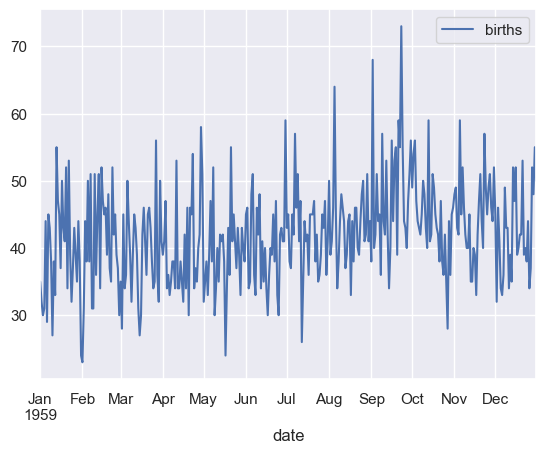

In [8]:
updated_birth.plot()
plt.show()

In [9]:
average_birth=updated_birth.rolling(window=20).mean()

In [10]:
average_birth

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
...,...
1959-12-27,42.10
1959-12-28,42.25
1959-12-29,42.50


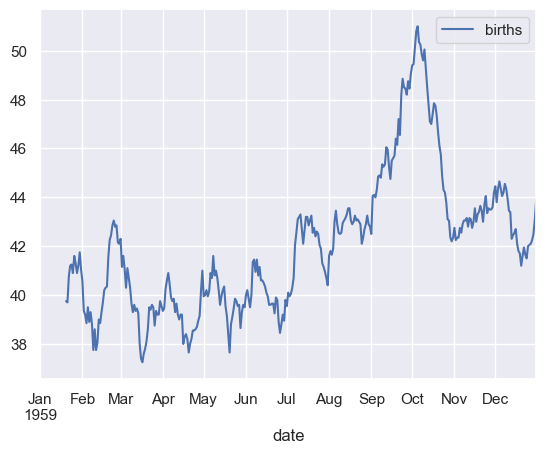

In [11]:
average_birth.plot()
plt.show()

In [12]:
sm.stats.durbin_watson(updated_birth)

array([0.04624491])

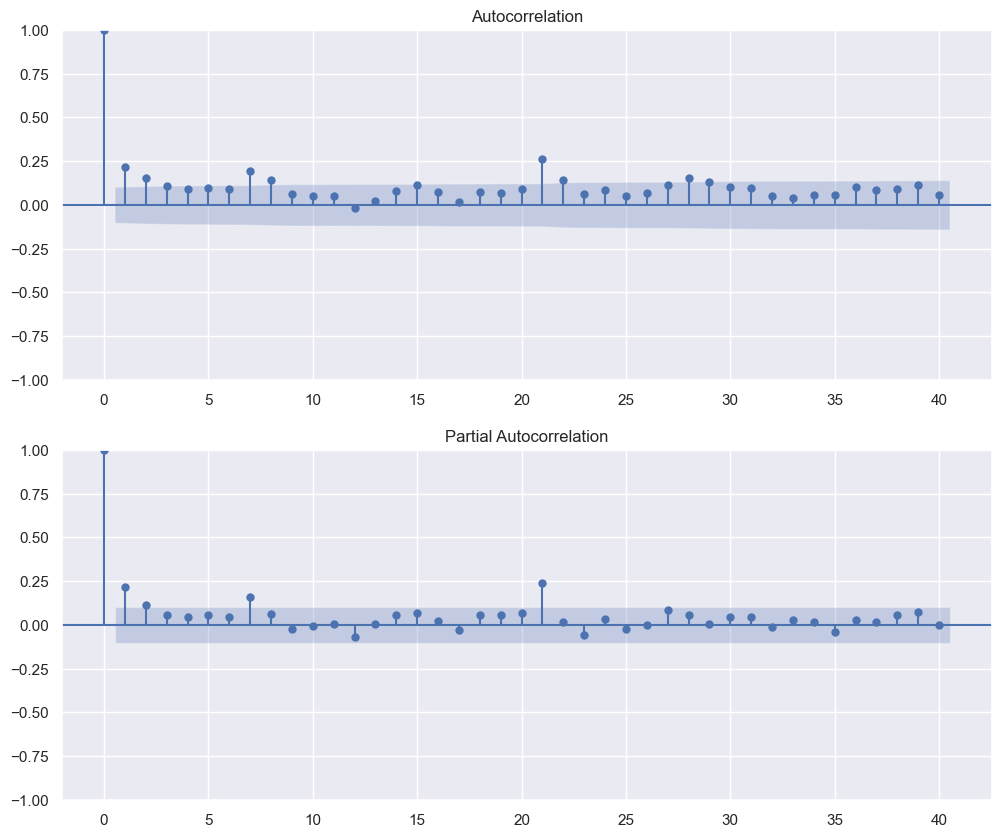

In [13]:
%matplotlib inline
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(updated_birth.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(updated_birth, lags=40, ax=ax2)

In [14]:
training_data=updated_birth[0:320]
test_data=updated_birth[320:]

In [15]:
from sklearn.model_selection import train_test_split
t_x,t=train_test_split(updated_birth)

In [37]:
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [38]:
arima= ARIMA(training_data,order=(2,1,3))

In [39]:
model=arima.fit()

In [40]:
model.aic

2167.8472399104467

In [41]:
pred= model.forecast(steps=45)[0]

In [45]:
pred

42.86063948044448

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
np.sqrt(mean_squared_error(test_data,pred))

TypeError: Singleton array 42.86063948044448 cannot be considered a valid collection.